# Zadanie 2 - Metody numeryczne
Cel znaleźć metodą bisekcji rzeczywiste rozwiązanie równania $f(x)=x^3 - 4x^2 - 1$ na dowolnym przedziale (a,b), na którym może się znajdować jeden pierwiastek ( czyli f(a)f(b) < 0 ).

In [1]:
#Importuję niezbędne biblioteki
import numpy as np
from matplotlib import pyplot as plt

#Definiuję niezbędne funkcje:

def fun(x):
    return 3*(x**3) - 4*(x**2) -1

def check_if_around_zero(f_x, x, e):
    condition_one = f_x(x+e) > 0 and f_x(x-e) < 0
    condition_two = f_x(x+e) < 0 and f_x(x-e) > 0
    if(condition_one or condition_two):
        return True
    else:
        return False 


In [2]:
def find_zero(f_x, a, b, e):
    #ustalenie przedziału:
    if(a>b):
        a,b = b,a
    found = False
    points = [a,b]
    x0 = 0.0
    beg = a
    end = b
    
    print("Szukam miejsca zerowego w przedziale: (%.2f, %.2f)"%(a, b))
    while(not found):
        x0 = a + (b-a)/2
        if(f_x(a)*f_x(b) >= 0):
            print("Podano błędny przedział!: f(a)*f(b) >= 0")
            break

        #Warunek znalezienia miejsca zerowego
        if(check_if_around_zero(f_x, x0, e)):
            found = True
            print("Miejsce zerowe: %f"%x0)

        else: #Zmiana przedziału
            if(f_x(a)*f_x(x0)>0):
                a = x0
            elif(f_x(a)*f_x(x0)<0):
                b = x0
            if(f_x(a)*f_x(b) > 0):
                print("Prawdopodobnie w podanym przedziale jest więcej niż jedno miejsce zerowe. Ta metoda sobie z tym nie poradzi")
                break
            points = points + [x0]
    print("Punkty wyszczególnione(położenie x):")
    print(points)
    
    #Graficzne przedstawienie:
    points_y = [f_x(i) for i in points] #Wartości y punktów z wyznaczanych przedziałów
    lines_x = np.arange(beg-abs(0.1*beg)+0.1, end+abs(0.1*end)+0.1, 0.1) #Punkty niezbędne do wykreślenia krzywej
    lines_y = np.array([f_x(i) for i in lines_x])
    plt.plot(lines_x, lines_y, "grey")
    plt.plot(points, points_y, "bs")
    if(found):
        plt.plot(x0, f_x(x0), "r*")
    plt.grid(True)
    plt.show()


## Test rozwiązania:
Po przygotowaniu funkcji chciałbym sprawdzić numeryczne rozwiązanie zagadnienia

Szukam miejsca zerowego w przedziale: (-3.00, 3.00)
Miejsce zerowe: 1.484619
Punkty wyszczególnione(położenie x):
[-3, 3, 0.0, 1.5, 0.75, 1.125, 1.3125, 1.40625, 1.453125, 1.4765625, 1.48828125, 1.482421875, 1.4853515625, 1.48388671875]


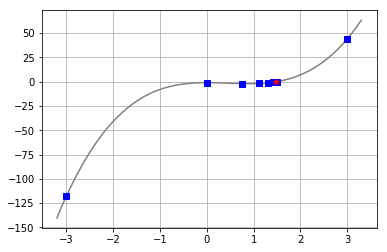

In [3]:
#Miejsce na wprowadzenie danych:
a = -3
b = 3
epsilon = 0.0001

#Rozwiązanie:
find_zero(fun, a, b, epsilon)

## Test poprawności
Przeprowadzę teraz kilka testów, po których funkcja powinna zwrócić błąd.

##### Test 1: Czy zaimplementowana metoda zauważy, że pomiędzy dwoma punktami nie ma miejsca zerowego:

Szukam miejsca zerowego w przedziale: (-1.00, 0.00)
Podano błędny przedział!: f(a)*f(b) >= 0
Punkty wyszczególnione(położenie x):
[-1, 0]


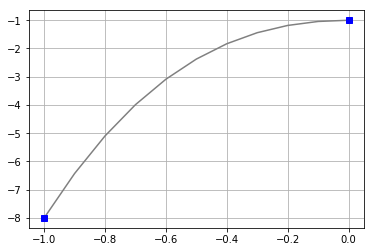

In [4]:
find_zero(fun, -1, 0, epsilon)

##### Test 2: Czy zaimplementowana metoda poprawi poprawnie zinterpretuje podanie a > b:

Szukam miejsca zerowego w przedziale: (-5.00, 5.00)
Miejsce zerowe: 1.484528
Punkty wyszczególnione(położenie x):
[-5, 5, 0.0, 2.5, 1.25, 1.875, 1.5625, 1.40625, 1.484375, 1.5234375, 1.50390625, 1.494140625, 1.4892578125, 1.48681640625, 1.485595703125, 1.4849853515625, 1.48468017578125]


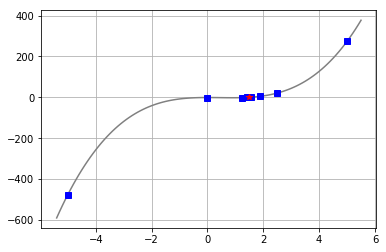

In [5]:
find_zero(fun, 5, -5, epsilon)

##### Test 3: Czy metoda szukająca zera zachowa się poprawnie dla innej funkcji?
Najpierw zdefinuję taką funkcję, będzie to wybrana funkcja kwadratowa.

Szukam miejsca zerowego w przedziale: (-5.00, 1.00)
Miejsce zerowe: -2.791382
Punkty wyszczególnione(położenie x):
[-5, 1, -2.0, -3.5, -2.75, -3.125, -2.9375, -2.84375, -2.796875, -2.7734375, -2.78515625, -2.791015625, -2.7939453125, -2.79248046875, -2.791748046875]


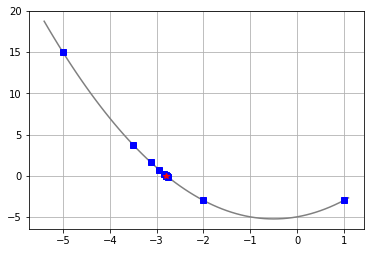

In [6]:
def sq_fun(x):
    return (x**2) + x -5

find_zero(sq_fun, -5, 1, epsilon)

##### Test 4: Czy metoda zauważy, że mogą być więcej niż dwa miejsca zerowe w danym przedziale?
Do tego będzie trzeba wykorzystać inną funkcję matematyczną:

Szukam miejsca zerowego w przedziale: (1.57, 9.52)
Miejsce zerowe: 3.141543
Punkty wyszczególnione(położenie x):
[1.5707963267948966, 9.524777960769379, 5.547787143782138, 3.559291735288517, 2.565044031041707, 3.0621678831651122, 3.3107298092268147, 3.1864488461959635, 3.124308364680538, 3.1553786054382504, 3.1398434850593944, 3.1476110452488224, 3.1437272651541086, 3.1417853751067515, 3.140814430083073, 3.141299902594912]


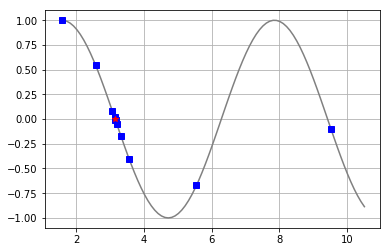

In [7]:
from math import sin
from math import pi

find_zero(sin, pi/2, 3*pi+0.1, epsilon)

Szukam miejsca zerowego w przedziale: (1.57, 11.10)
Miejsce zerowe: 9.424785
Punkty wyszczególnione(położenie x):
[1.5707963267948966, 11.095574287564276, 6.333185307179586, 8.714379797371931, 9.904977042468104, 9.309678419920019, 9.607327731194061, 9.45850307555704, 9.38409074773853, 9.421296911647785, 9.439899993602413, 9.430598452625098, 9.425947682136442, 9.423622296892113]


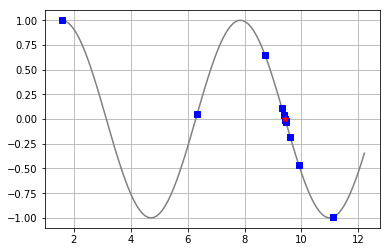

In [8]:
find_zero(sin, pi/2, 7/2*pi+0.1, epsilon)

Widać ta metoda nie działa doskonale i jest wrażliwa na zmiany. Z tego powodu powinno się ją stosować na przedziale podejrzanym o posiadanie jednego miejsca zerowego. Alternatywą byłoby przeszukanie kolejnego miejsca zerowego poprzez ustalenie nowego przedziału: pomiędzy pierwszą odrzuconą wartością, a znalezionym miejscem zerowym (najlepiej powiększonym lub pomniejszonym o epsilon).